Sales                                            
Quarter        1           2               3         4   All
Country       US ญี่ปุ่น  US ญี่ปุ่น ญี่ปุ่น  ไทย  ไทย      
Employee                                                    
Bill         800       0  60       0       0  300    0  1160
กอบเกียรติ     0     300   0     500     900    0  250  1950
All          800     300  60     500     900  300  250  3110

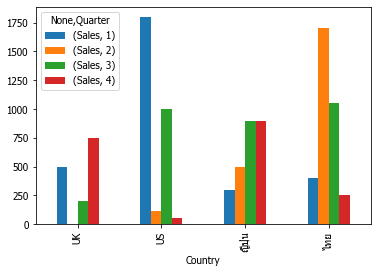

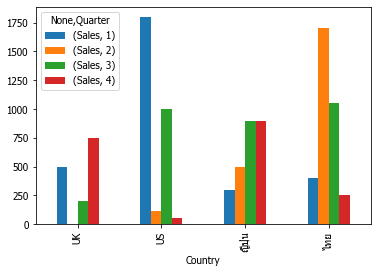

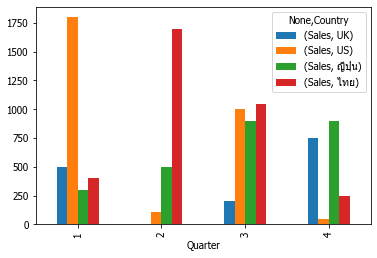

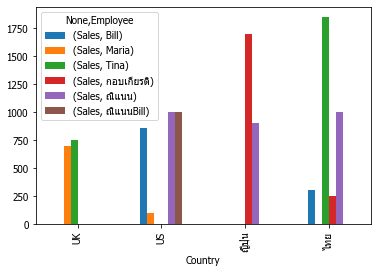

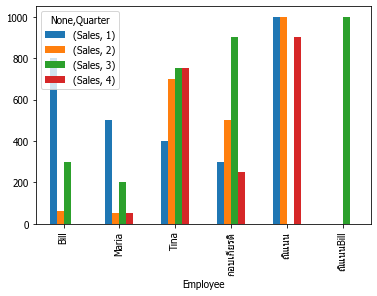

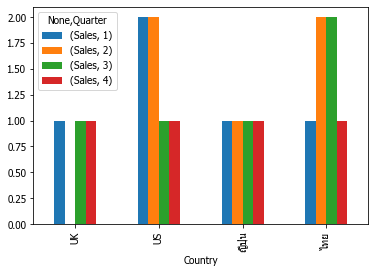

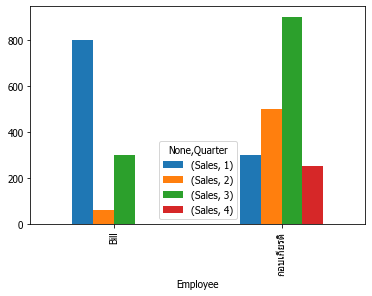

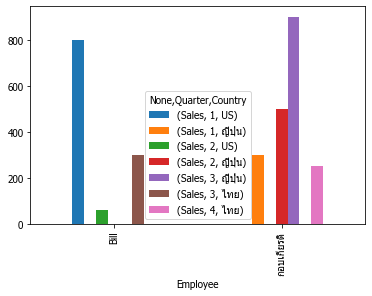

In [11]:
#สรุปข้อมูลด้วย Pivot Table
import pandas as pd
Employees = ['Bill','Maria','Tina','กอบเกียรติ','ณิแนน','Bill','Maria','Tina','กอบเกียรติ','ณิแนน','Bill','Maria','Tina','กอบเกียรติ','ณิแนน''Bill','Maria','Tina','กอบเกียรติ','ณิแนน']
Sales = [800,500,400,300,1000,60,50,700,500,1000,300,200,750,900,1000,50,750,250,900,1000]
Quarter = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]
Country =['US','UK','ไทย','ญี่ปุ่น','US','US','US','ไทย','ญี่ปุ่น','ไทย','ไทย','UK','ไทย','ญี่ปุ่น','US','US','UK','ไทย','ญี่ปุ่น','ญี่ปุ่น']
Employee_series = pd.Series(Employees)
Sale_series = pd.Series(Sales)
Quarter_series = pd.Series(Quarter)
Country_series = pd.Series(Country)
cols = ['Employee','Sales','Quarter','Country']
datas = list(zip(Employee_series,Sale_series,Quarter_series,Country_series))
df = pd.DataFrame(datas , columns = cols)
df.to_excel('ABC Company.xlsx', index_label = cols)
colss = 'b:e' #ต้องการข้อมูลคอลัมน์ B ถึง E
#df1 = pd.read_excel(uri,usecols=colss,header=2, dtype={'Quarter':str})
df.Quarter = df.Quarter.astype('object')


# ข้าม Header 2 แถว
df.head(4) #ตรวจดู 4 แถวแรก

#df.Quarter_series = df.Quarter_series.astype('category')
df.dtypes
df.describe()
df.mean()
df.std()
df.max()
df.min()
df.Sales.sum() #รวมเฉพาะคอลัมน์ Sales จะได้ผลรวมเท่ากับ 
pvt = df.pivot_table(index='Quarter') #ไม่ระบุ aggfunc เท่ากับว่าให้หาค่าเฉลี่ย mean
pvt = df.pivot_table(index='Quarter', margins=True) #lสรุปผลรวมท้ายตารางด้วย
pvt
df.groupby('Quarter').mean() #ใช้ .groupby ก็ได้ค่าเฉลี่ยทั้งหมดทุกQuarter

#ค่าเฉลี่ยยอดขายแต่ละคนในแต่ละไตรมาส
#index คือไตรมาสรายชื่อ (Quarter,Employee)
pvt = df.pivot_table(index=['Quarter','Employee'], margins = True)  #column ไหนอยู่หน้าจะขึ้นมาก่อน
pvt = df.pivot_table(index=['Employee','Quarter'], margins = True) #column ไหนอยู่หน้าจะขึ้นมาก่อน

#ยอดขายรวมแต่ละไตมาส ให้ใช้index ตามไตรมาส
pvt = df.pivot_table(index=['Quarter'], values = 'Sales' , aggfunc ='sum') #ไม่มีรวม(All)

#แบบมีรวม All
pvt = df.pivot_table(index = ['Quarter'], values = 'Sales', aggfunc = 'sum', margins = True)
#pvt = pvt.applymap("{0:,}".format) #ใส่คอมม่าให้ตัวเลขครบ 3 ตัว

#สามารถกำหนด sum โดยใช้ numpyได้
import numpy as np
pvt = df.pivot_table(index = ['Quarter'], aggfunc = np.sum , margins = True)
pvt.style.format({'Sales':"{:,.2f}"})
pvt.applymap("${0:,.2f}".format) #รูปแบบ $ ทศนิยม 2 ตำแหน่ง เช่น $2,340.50

# กรณีไม่ระบุ values จะทำการคำนวณทุกคอลัมน์ที่เป็นตัวเลข
pvt = df.pivot_table(index = ['Quarter'],aggfunc = 'sum', margins =True)

# กรณี values มีหลายคอลัมน์ ให้กำหนดเป็นชนิด List

pvt = df.pivot_table(index= ['Quarter'], values=['Sales','Country'],aggfunc='sum')
pvt
df.groupby('Quarter').sum() #รวมกลุ่มของ Quarter 

#ยอดขายรวม เฉลี่ย สูงสุดต่ำสุด แต่ละQuarter
pvt = df.pivot_table(index = ['Quarter'], values = ['Sales'], aggfunc = ['sum','max','min','mean'], margins =True)
pvt

#ในกรณีที่มีหลายคอลัมน์ และต้องการให้คิดแยกคอลัมน์ เช่น Sales คิดรวม(sum) แต่คอลัมน์ Import คิดค่าเฉลี่ย ทำดังนี้(เนื่องจากตอนนี้ยังไม่มีคอมลัมน์ข้อมูล import ดังนั้นให้สร้างขึ้นมาก่อน)ตัวอย่างนี้เพื่อให้ง่ายจะให้Sales importมา
# เพิ่มคอลัมน์ import โดยสร้างจาก sales-50
df['Import'] = df['Sales']-50
df.head()

#ให้ Sales คำนวณแบบ sum ส่วน import คำนวณแบบ mean
pvt = df.pivot_table(index = ['Quarter'], values = ['Sales','Import'], aggfunc= {'Sales':'sum','Import':'mean'},margins = True)
pvt

#การเรียงลำดับข้อมูล
#การเรียงข้อมูล ใช้.sort_values()
# DataFrame.sort_values(columns, วิธีจัดเรียง ascending)
# ascending = True หรือ ไม่กำหนด (Default) จะเรียงจากน้อยไปมาก
# ascending = False เรียงจากมากไปน้อย
pvt = df.pivot_table(index = ['Quarter'],values = 'Sales',aggfunc = 'sum')
pvt = pvt.applymap("{0:,}".format) #รูปแบบ,หน้า3หลัก

#pvt.sort_values('Sales') #เรียงจากน้อยไปมาก
pvt.sort_values('Sales',ascending = False) #จากมากไปน้อย
#จัดเรียงแล้ว assign ค่ากลับให้ pvt
pvt

#การพลอตกราฟ
#%matplotlib inline
#pvt = df.pivot_table(index=['Quarter'],values = ['Sales'], aggfunc = 'sum')
#pvt.plot.bar()
#pvt_sort = pvt.sort_values('Sales',ascending = False)
#pvt_sort.plot.bar()

#ยอดขายรวมแต่ละคน
#ใช้ import matplotlib.pyplot as plt แทน %matplotlib inline
#import matplotlib.pyplot as plt
#plt.rc('font',family = 'tahoma') #กราฟรองรับภาษาไทย #มีการกำหนดพารามิเตอรร์กราฟจึงต้องimport matplotlib

#pvt = df.pivot_table(index = ['Employee'],values = ['Sales'],aggfunc ='sum')
#pvt_sort = pvt.sort_values('Sales',ascending = False)
#pvt_sort.plot.bar()
#pvt

#ยอดขายรวมแต่ละประเทศ
import matplotlib.pyplot as plt
plt.rc('font',family = 'tahoma')

pvt = df.pivot_table(index = ['Country'], values = ['Sales'] ,aggfunc = 'sum')
#plt.title("Sales report") #ข้อความtitles หัวกราฟ
#pvt.sort_values(['Sales'],ascending = False).plot.bar() #เรียงจากมากไปน้อย แล้วพลอตกราฟ
#plt.title("Sales report") #พลอตกราฟก่อนแล้วจึงใส่ข้อความ
#pvt
#ยอดขายแต่ละประเทศแต่ละไตรมาส
#pvt = df.pivot_table(index = ['Country','Quarter'], values = ['Sales'], aggfunc = 'sum')
#pvt.plot.bar()
#plt.title("Sales report")
#pvt

#ยอดขายแต่ละประเทศ แต่ละไตรมาส 2 มิติ
#แสดงกราฟ2มิติ โดยแยกคอลัมน์ด้วยไม่ต้องรวมยอดท้ายตาราง
#pvt2 = df.pivot_table(index = ['Country'], columns = ['Quarter'], values = ['Sales'], aggfunc = 'sum', fill_value = 0 )#,margins = True)
#pvt2.plot.bar()

#pvt3 = df.pivot_table( index = ['Country'], columns = ['Quarter'] , values = ['Sales'] , aggfunc = 'sum', fill_value = 0 , margins = True)
#pvt3 = pvt3.applymap("{0:,}".format)
#pvt3.plot.bar()
#pvt3
#for graph
#ไม่นำ all มาพล็อตกราฟด้วย ไม่ต้องเติม margins = True
pvt2 = df.pivot_table(index = ['Country'], columns =['Quarter'], values = ['Sales'],aggfunc = 'sum', fill_value = 0 )
pvt2.plot.bar()
#for table
pvt = df.pivot_table( index = ['Country'], columns = ['Employee'], values = ['Sales'], aggfunc = 'sum' , fill_value = 0 , margins= True)
pvt = pvt.applymap("{0:,}".format)
pvt

pvt = df.pivot_table( index = ['Country'], columns = ['Quarter'], values = ['Sales'], aggfunc = 'sum', fill_value = 0 , margins =True )


#for graph
g = pvt.drop('All') #remove row all
g.drop('All', level =1 , axis =1 , inplace =True) #ลบส่วนAllออกไป
g.plot.bar()

pvt = pvt.applymap("{0:,}".format)
pvt

#transpost กราฟ for graph
pvt2 = df.pivot_table( index = ['Quarter'], columns = ['Country'], values= ['Sales'], aggfunc = 'sum', fill_value=0)
pvt2.plot.bar()

#for table
pvt = df.pivot_table( index= ['Quarter'], columns = ['Country'], values=['Sales'], aggfunc = 'sum', fill_value=0 , margins =True)
pvt = pvt.applymap("{0:,}".format)
pvt

#ยอดขายรวมแต่ละคนในประเทศ
#for table
pvt2 = df.pivot_table(index = ['Country'], columns = ['Employee'], values = ['Sales'],aggfunc = 'sum',fill_value = 0)
pvt2.plot.bar()

#for table
pvt = df.pivot_table(index = ['Country'], columns = ['Employee'], values = ['Sales'], aggfunc = 'sum' , fill_value = 0 , margins = True)
pvt = pvt.applymap("{0:,}".format)
pvt

#ยอดขายรมแต่ละคนในแต่ละไตรมาส
pvt2 =df.pivot_table(index = ['Employee'],columns = ['Quarter'] , values = ['Sales'] , aggfunc = 'sum', fill_value = 0)
pvt2.plot.bar()

#for table

pvt = df.pivot_table(index = ['Employee'],columns = ['Quarter'], values = ['Sales'], aggfunc = 'sum', fill_value = 0 , margins = True)
pvt= pvt.applymap("{0:,}".format)
pvt

#ต้องการนับจำนวนพนังงานที่สามารถขายได้แต่ละไตรมาส aggfunc = 'count'
pvt2 = df.pivot_table( index = ['Country'], columns = ['Quarter'], values = ['Sales'], aggfunc = 'count',fill_value = 0) #fill value = 0 หมายความว่าถ้าไม่มีข้อมูลให้
pvt2.plot.bar()

#for table
pvt = df.pivot_table(index = ['Country'] ,columns = ['Quarter'], values= ['Sales'], aggfunc = 'count', fill_value = 0 , margins = True)
pvt = pvt.applymap("{0:,}".format)
pvt

#เปรียบเทียบผลงานพนักงาน
#for graph เปรียบเทียบ ระหว่าง กอบเกียรติ กับ Bill
pvt2 = df[(df.Employee.str.match('กอบ')) | (df.Employee.str.match('Bill'))].pivot_table( index = ['Employee'], columns=['Quarter'],values = ['Sales'], fill_value = 0 , aggfunc ='sum')
pvt2.plot.bar()

#for table 
pvt = df[(df.Employee.str.match('กอบ')) | (df.Employee.str.match('Bill'))].pivot_table(index = ['Employee'], 
                                                                                       columns = ['Quarter'], values = ['Sales'], aggfunc = 'sum', fill_value = 0 , margins = True)
pvt

#ตัวอย่าง ต้องการดูละเอีนดลึกลงไปว่าในแต่ละไตรมาส มีประเทศอะไรขายได้บ้าง
pvt2 = df[(df.Employee.str.match('กอบ')) | (df.Employee.str.match('Bill'))].pivot_table(
index = ['Employee'], columns = ['Quarter','Country'], values= ['Sales'], aggfunc = 'sum', fill_value = 0,)
pvt2.plot.bar()
#for table
pvt = df[(df.Employee.str.match('กอบ')) | (df.Employee.str.match('Bill'))].pivot_table(
index = ['Employee'], columns = ['Quarter','Country'], values = ['Sales'], aggfunc = 'sum', fill_value = 0, margins = True )
pvt


